# Resource Timeline Example

For details and documentation see https://www.kalasim.org/resource/#timeline

In [ ]:
//@file:Repository("*mavenLocal")
//@file:DependsOn("com.github.holgerbrandl:kalasim:0.7-SNAPSHOT")

@file:DependsOn("com.github.holgerbrandl:kalasim:0.6.94")
@file:DependsOn("com.github.holgerbrandl:kravis:0.8.1")

import org.kalasim.*
import kravis.*

In [10]:
val sim = createSimulation{}

val r1 = Resource(capacity = 4)
val r2 = Resource(capacity = 4)

object : Component() {
    override fun process() = sequence {
        request(r1)
        hold(100)
        release(r1)
    }
}

object : Component() {
    override fun process() = sequence {
        hold(3)

        request(r2) {
            hold(1)

            request(r1, description = "foo") {
                hold(2)
            }

            hold(1)

             request(r1, description = "bar") {
                hold(2)
             }
        }
    }
}

sim.run(10)

{
  "now": "10.00",
  "num_components": 3,
  "queue": [".1"]
}

In [18]:
r1.timeline

[{"time":"6.00","type":"RequestScopeEvent"}, {"time":"9.00","type":"RequestScopeEvent"}]

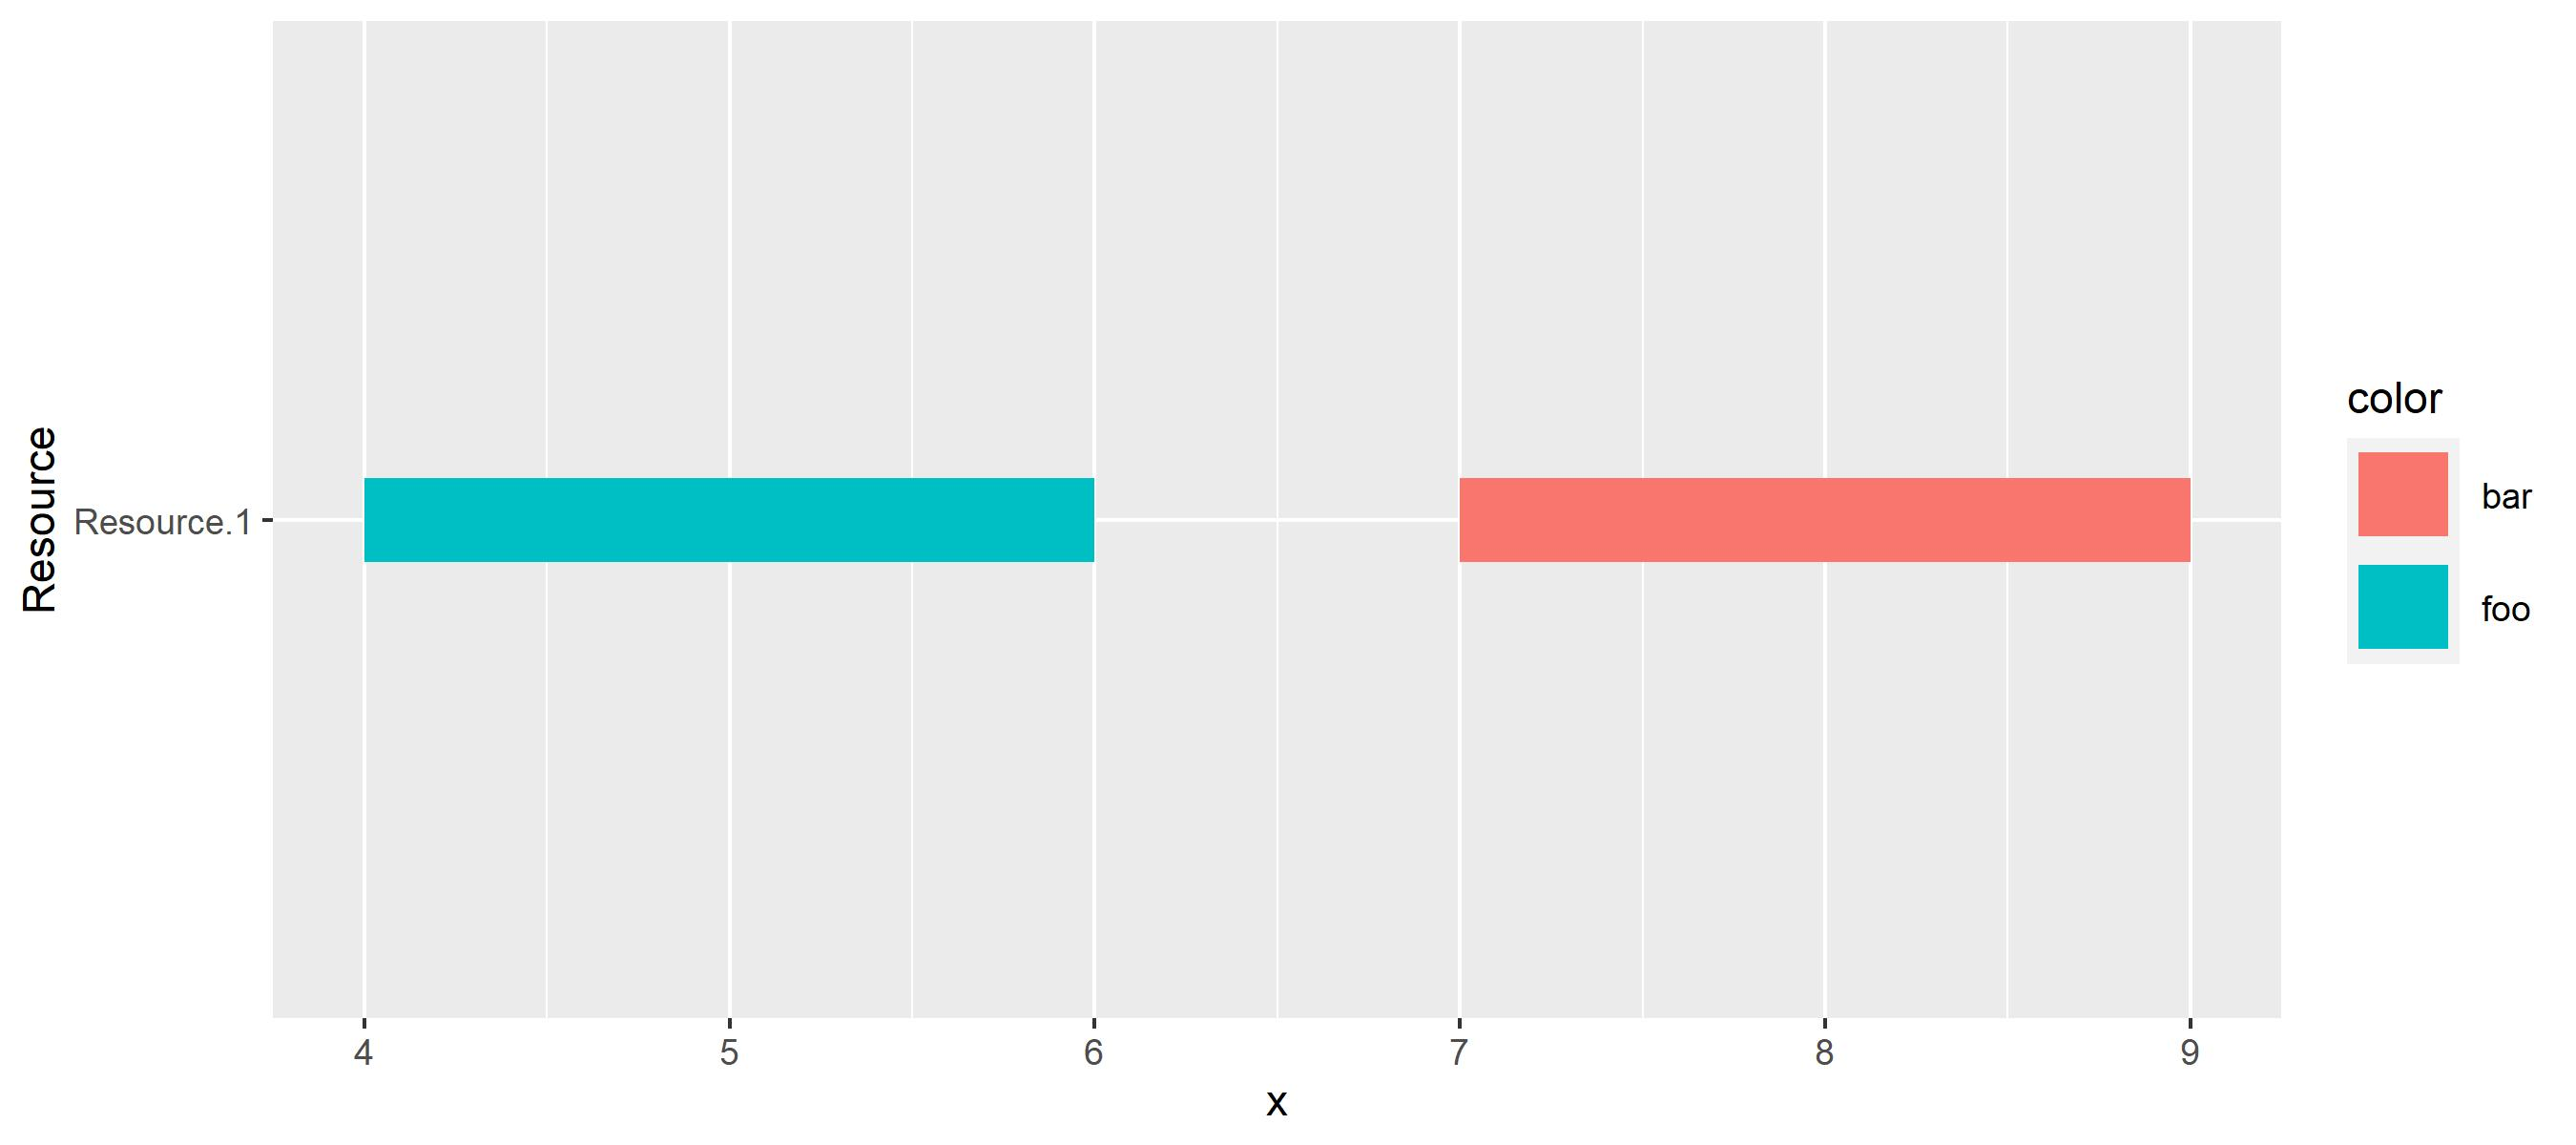

In [29]:
r1.timeline
    .plot(y={resource.name},  yend={resource.name},x={from},xend={to}, color={activity})
    .geomSegment(size=10.0).yLabel("Resource")